In [110]:
#import

In [111]:
from pandasql import sqldf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import io
import requests
from mpl_toolkits.mplot3d import Axes3D

In [112]:
#project csv

In [113]:
project_csv = pd.read_csv('../data/Headway Data.csv')
print(project_csv)

         CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0          120211101             1      76447164  2021-11-01           7   
1          120211101             1      76447165  2021-11-01           7   
2          120211101             1      76447166  2021-11-01           7   
3          120211101             1      76447167  2021-11-01          50   
4          120211101             1      76447168  2021-11-01          50   
...              ...           ...           ...         ...         ...   
1981710    120221101             1      91057724  2022-11-01          50   
1981711    120221101             1      91057851  2022-11-01          50   
1981712    120221101             1      91057852  2022-11-01          50   
1981713    120221101             1      91057881  2022-11-01          56   
1981714    120221101             1      91057882  2022-11-01          56   

         BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  ...  \
0     

In [114]:
#project_csv_df

In [115]:
project_csv_df = pd.DataFrame(project_csv)
project_csv_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [116]:
heatmap_df = project_csv_df.drop(project_csv_df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,21,22,23,24,25,26,27,28,29]], axis=1)
heatmap_df

,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
0,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333
1,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333
2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN
3,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN
4,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN
...,...,...,...,...,...,...
1981710,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN
1981711,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333
1981712,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN
1981713,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN


In [117]:
heatmap_df2 = project_csv_df.drop(project_csv_df.columns[[0,1,2,3,4,5,7,8,9,10,11,12,13,14,21,22,23,24,25,26,27,28,29]], axis=1)
heatmap_df2

,OPERATOR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
0,2088,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333
1,2088,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333
2,2088,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN
3,2088,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN
4,2088,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN
...,...,...,...,...,...,...,...
1981710,2355,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN
1981711,1880,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333
1981712,1880,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN
1981713,1922,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN


In [118]:
question_3 = project_csv_df.sort_values(['ACTUAL_HDWY'], ascending = False)
question_3

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1632095,120220901,1,89450284,2022-09-01,23,2313,2053,317010,0,FROM DOWNTOWN,...,1084.616666,1054.616666,0,0,1,1,1.0,0,1090,NaN
812313,120220409,2,81743530,2022-04-09,23,2311,2246,307334,0,FROM DOWNTOWN,...,961.333333,931.333333,0,0,1,1,1.0,0,1062,0.000000
244803,120211218,2,78494752,2021-12-18,52,5212,2399,304625,0,TO DOWNTOWN,...,825.666666,765.666666,0,0,1,0,0.0,0,520,3.416666
1564295,120220820,2,89056577,2022-08-20,23,2311,2246,316891,0,TO DOWNTOWN,...,802.033333,772.033333,0,0,1,1,1.0,0,1152,0.000000
1211581,120220618,2,85035615,2022-06-18,56,5605,2547,314641,0,TO DOWNTOWN,...,718.266666,698.266666,0,0,1,0,0.0,0,370,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981709,120221101,1,91057723,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,20.916666
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [119]:
project_drop = project_csv_df.drop(project_csv_df.columns[[0,1,2,7,9,10,19,20,21,22,23,24,25,26,27,28,29]], axis=1)
project_drop

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE
0,2021-11-01,7,1704,2088,0,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000
1,2021-11-01,7,1704,2088,0,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000
2,2021-11-01,7,1704,2088,0,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333
3,2021-11-01,50,1704,2088,0,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333
4,2021-11-01,50,1704,2088,0,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,9302,2355,0,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333
1981711,2022-11-01,50,9950,1880,0,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000
1981712,2022-11-01,50,9950,1880,0,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333
1981713,2022-11-01,56,9975,1922,0,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666


In [120]:
adherence = project_drop.sort_values(by=['ADHERENCE'], ascending= False)
adherence

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE
102680,2021-11-20,50,5000,2420,0,13.0,0,36.149997,-86.858261,15:06:00,13:47:10,13:47:10,78.833333
102682,2021-11-20,50,5000,2420,0,11.0,0,36.153870,-86.818414,15:14:00,13:56:58,13:56:58,77.033333
102681,2021-11-20,50,5000,2420,0,12.0,0,36.152077,-86.842746,15:10:00,13:53:09,13:53:09,76.850000
102679,2021-11-20,50,5000,2420,0,14.0,0,36.138535,-86.881130,14:58:00,13:41:16,13:41:16,76.733333
1980494,2022-11-01,56,5602,653,1,13.0,2,36.300470,-86.695610,10:20:00,09:11:13,09:11:13,68.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980886,2022-11-01,56,5606,2037,0,9.0,0,36.210070,-86.733544,18:47:00,NaN,NaN,NaN
1980887,2022-11-01,56,5606,2037,0,10.0,0,36.256567,-86.714100,18:58:00,NaN,NaN,NaN
1980888,2022-11-01,56,5606,2037,0,11.0,0,36.300827,-86.694508,19:07:00,NaN,NaN,NaN
1980889,2022-11-01,56,5606,2037,0,12.0,0,36.307973,-86.685963,19:11:00,NaN,NaN,NaN


In [121]:
adherence_mean = adherence[['ADHERENCE', 'OPERATOR']].mean(axis=1)
adherence_mean

102680     1249.416667
102682     1248.516666
102681     1248.425000
102679     1248.366667
1980494     360.891666
              ...     
1980886    2037.000000
1980887    2037.000000
1980888    2037.000000
1980889    2037.000000
1980890    2037.000000
Length: 1981715, dtype: float64

In [122]:
adherence_mean_df = pd.DataFrame(adherence_mean)
adherence_mean_df

,0
102680,1249.416667
102682,1248.516666
102681,1248.425000
102679,1248.366667
1980494,360.891666
...,...
1980886,2037.000000
1980887,2037.000000
1980888,2037.000000
1980889,2037.000000


In [123]:
sql_df= 'SELECT OPERATOR, AVG(ADHERENCE) FROM project_drop GROUP BY OPERATOR ORDER BY AVG(ADHERENCE) DESC'
sqldf(sql_df, globals())
op_adher = sqldf(sql_df, globals())
op_adher

,OPERATOR,AVG(ADHERENCE)
0,30,18.450000
1,85,8.833333
2,1201,4.583333
3,1471,2.808333
4,1239,2.344946
...,...,...
453,1372,-8.880262
454,2485,-11.808414
455,2219,NaN
456,1260,NaN


In [124]:
head_way1= 'SELECT OPERATOR, AVG(ADHERENCE), AVG(ACTUAL_HDWY) FROM question_3 GROUP BY OPERATOR ORDER BY AVG(ADHERENCE) DESC'
sqldf(head_way1, globals())
headway_adher = sqldf(head_way1,globals())
headway_adher

,OPERATOR,AVG(ADHERENCE),AVG(ACTUAL_HDWY)
0,30,18.450000,8.375000
1,85,8.833333,2.166666
2,1201,4.583333,39.000000
3,1471,2.808333,NaN
4,1239,2.344946,10.716666
...,...,...,...
453,1372,-8.880262,20.444447
454,2485,-11.808414,15.334722
455,2219,NaN,NaN
456,1260,NaN,NaN


In [125]:
head_way1= 'SELECT OPERATOR, AVG(ADHERENCE), AVG(ACTUAL_HDWY) FROM question_3 WHERE ACTUAL_HDWY IS NOT NULL GROUP BY OPERATOR ORDER BY AVG(ACTUAL_HDWY) ASC'
sqldf(head_way1, globals())
adher_headway = sqldf(head_way1,globals())
adher_headway

,OPERATOR,AVG(ADHERENCE),AVG(ACTUAL_HDWY)
0,1924,-1.533333,0.000000
1,85,8.833333,2.166666
2,1599,-0.066666,7.883333
3,433,-0.318981,8.366666
4,30,18.450000,8.375000
...,...,...,...
440,1336,-1.712998,38.499243
441,1201,4.583333,39.000000
442,2202,-3.101852,42.216666
443,659,-0.308974,46.117196


In [126]:
corrM = heatmap_df.corr()
corrM

,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
ADHERENCE,1.000000,0.029726,-0.086441
SCHEDULED_HDWY,0.029726,1.000000,0.879361
ACTUAL_HDWY,-0.086441,0.879361,1.000000


/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_97587/1582552976.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


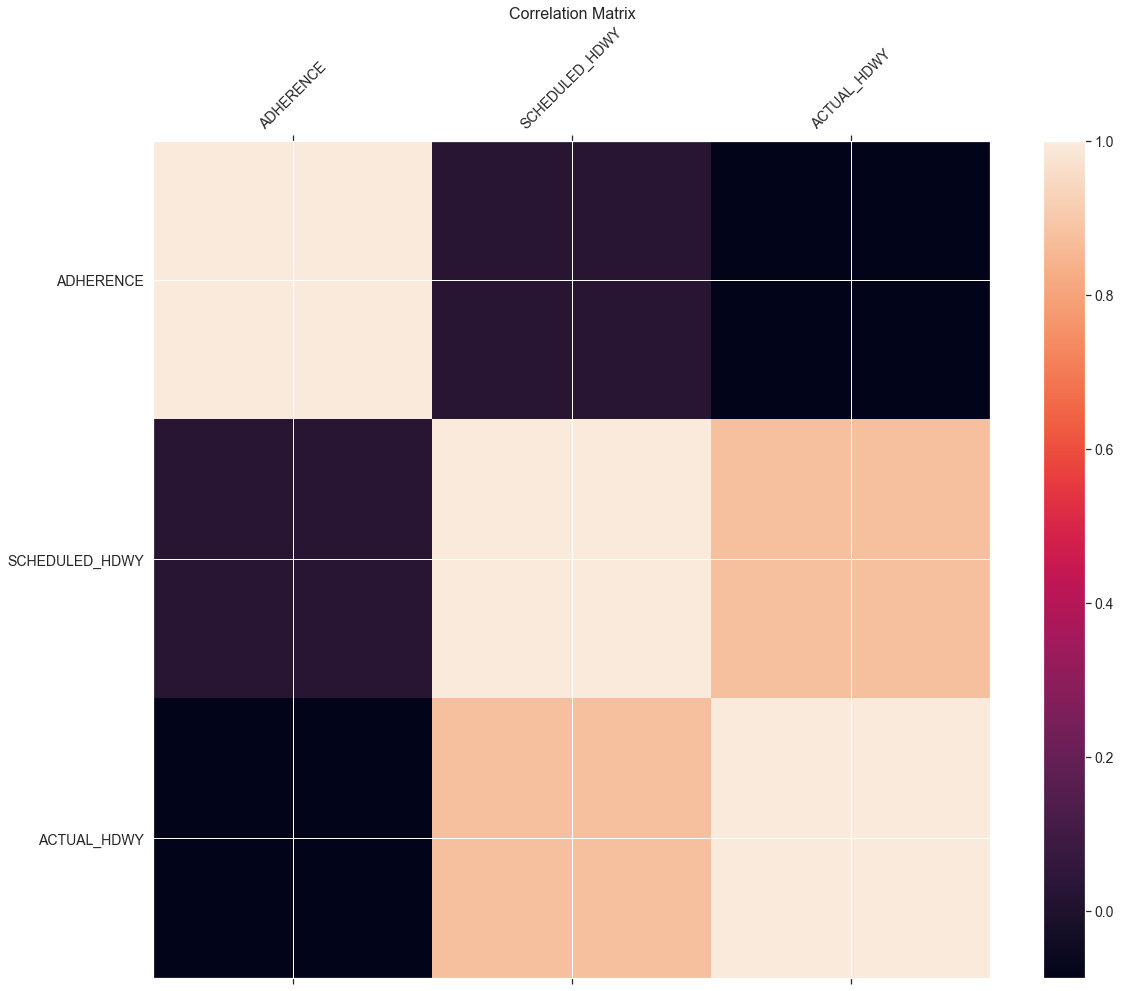

In [127]:
f = plt.figure(figsize=(19, 15))
plt.matshow(heatmap_df.corr(), fignum=f.number)
plt.xticks(range(heatmap_df.select_dtypes(['number']).shape[1]), heatmap_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(heatmap_df.select_dtypes(['number']).shape[1]), heatmap_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

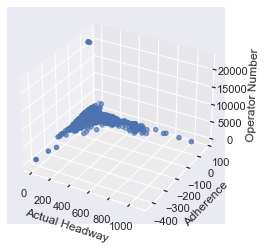

In [128]:
sns.set(style='darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
x= heatmap_df2['ACTUAL_HDWY']
y= heatmap_df2['ADHERENCE']
z= heatmap_df2['OPERATOR']
size= heatmap_df2 ['OPERATOR']


ax.set_xlabel('Actual Headway')
ax.set_ylabel('Adherence')
ax.set_zlabel('Operator Number')

ax.scatter(x, y, z,)

plt.show()

<AxesSubplot:xlabel='AVG(ACTUAL_HDWY)', ylabel='AVG(ADHERENCE)'>

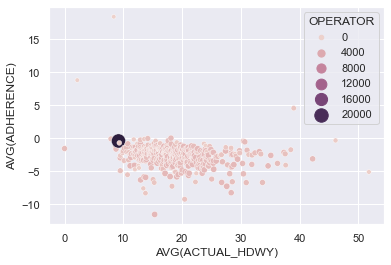

In [129]:
sns.scatterplot(data=adher_headway, x='AVG(ACTUAL_HDWY)', y='AVG(ADHERENCE)', hue='OPERATOR', size='OPERATOR', sizes=(20,200))

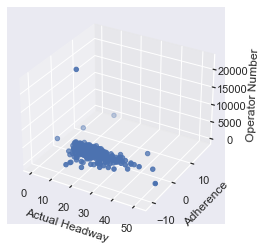

In [130]:
sns.set(style='darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
x= adher_headway['AVG(ACTUAL_HDWY)']
y= adher_headway['AVG(ADHERENCE)']
z= adher_headway['OPERATOR']
size= adher_headway['OPERATOR']


ax.set_xlabel('Actual Headway')
ax.set_ylabel('Adherence')
ax.set_zlabel('Operator Number')

ax.scatter(x, y, z, c='r', marker='c')

plt.show()